# 決策樹概述

決策樹是一種分類及迴歸方法，在分類問題中，其旨在透過不斷地將樣本集合以樹形結構的方式，劃分成一個一個的小集合方便我們對預測樣本來分類，決策樹的範例如圖所示：

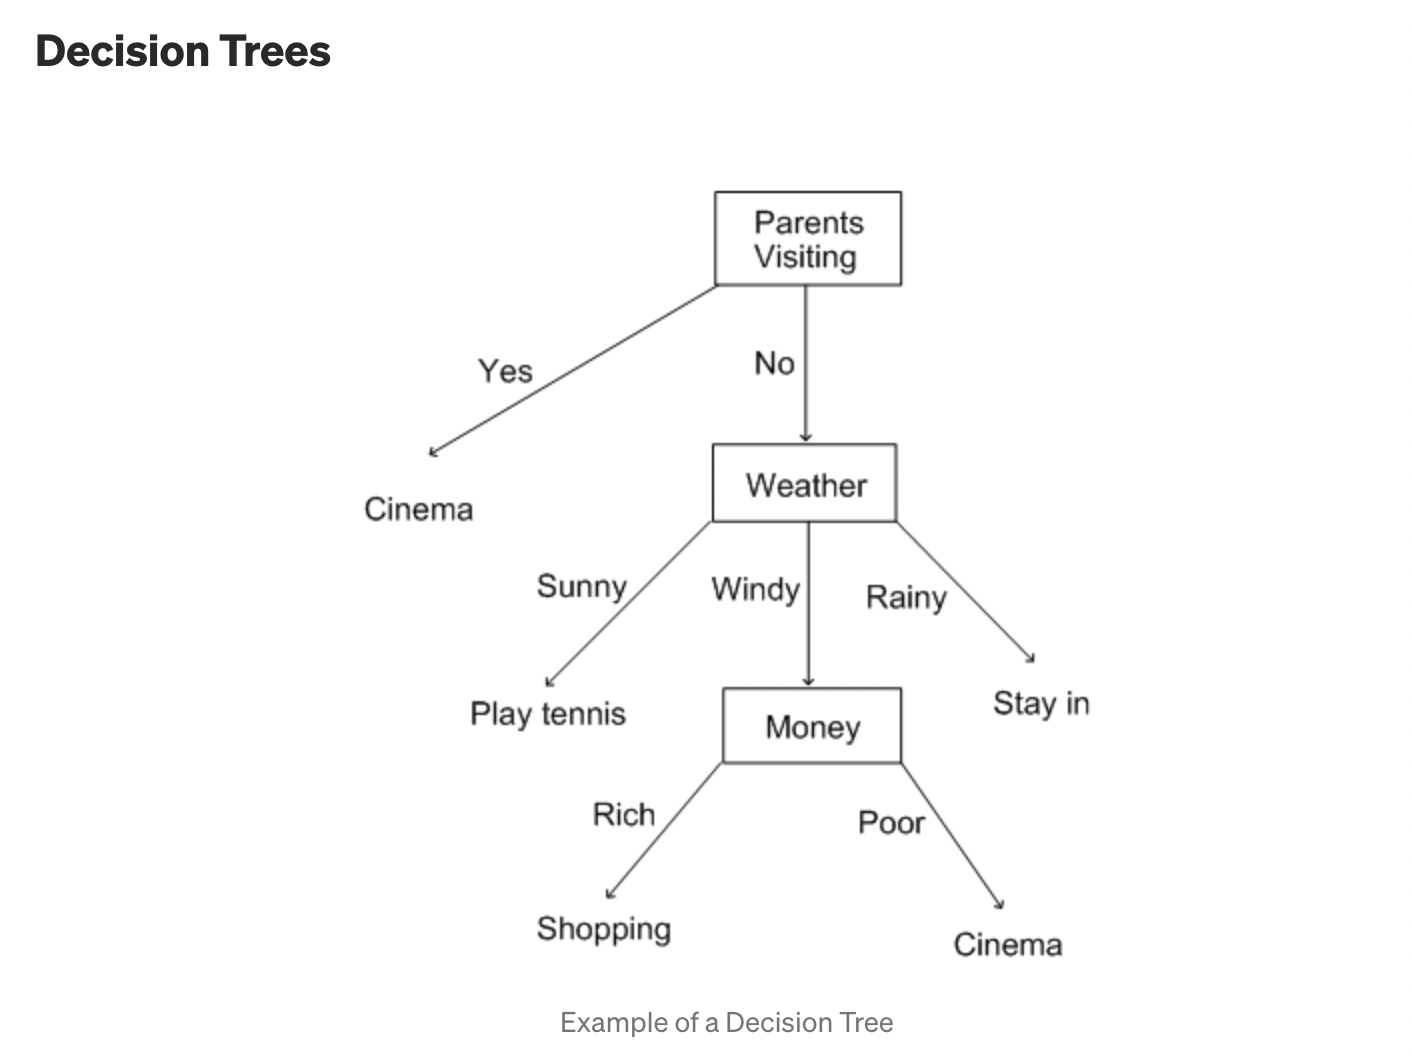

In [1]:
from IPython.display import Image
Image(filename=('./dt.png')
     ,width=500)

<!-- <img style="border-radius: 0.3125em;box-shadow: 0 2px 4px 0 rgba(34,36,38,.12),0 2px 10px 0 rgba(34,36,38,.08);width: 400px;" src="./dt.png"> -->

在樹中的最上層為「根節點」，最底部稱為「葉節點」，其餘的節點為「內部節點」，根節點代表整個訓練樣本集合，葉節點表示樣本集合最終劃分後每個子區域(cell)，而每個內部節點表示依照「某個特徵」劃分，一開始決策樹的建構會使它生成直到將所有訓練樣本劃分完畢或是沒有合適的特徵能夠再分枝後才停止。

## 決策樹與條件機率分配的關係
我們可以先暫時定義訓練樣本集$T=\{(X_{1}, y_{1}),(X_{2}, y_{2}), \cdots,(X_{n}, y_{n})\}$，$X_i=(x_{i}^{(1)}, x_{i}^{(2)}, ......, x_{i}^{(k)})^T$且$y_i \in \{c_1,c_2,\cdots, c_M\}$有$M$種分類類別，而決策樹的過程其實也如同是在$X$特徵空間中劃分為一個一個cell，並計算每個cell中類別的條件機率分配$P(y|X=某個cell)$，並把每個cell中最多樣本的$y$水準當作是該cell的輸出。

# 模型學習算法

在決策樹的學習中，我們希望能透過訓練數據來學習得到一棵樹，過程中我們能得到的決策樹有很多的可能（特徵劃分的順序、特徵劃分的值大小都會得到不同的樹），而我們的目的是希望能找到一棵在訓練集上有很好的fit表現且同時在測試集上也有優秀預測表現的樹，因此整個決策樹的學習過程包含了三部分：特徵選擇、樹的生成以及樹的剪枝，特徵選擇的目的為我們應以何種方式來決定特徵的劃分順序藉此生成決策樹，而剪枝的目的為讓模型能有更好的泛化能力，即避免overfitting的狀況發生。常用的決策樹的學習算法有三種，各自的核心概念也多少有點不同，在本節中我會介紹ID3、C4.5以及CART三種常用的算法，同時也提及個別算法的特徵選擇、樹的生成以及樹的剪枝三部分。

## ID3與C4.5
由於ID3與C4.5的特徵選擇的概念類似，因此在這邊統一說明。

### 特徵選擇
首先，我們做特徵選擇的目的是在每個階段中都找到應該被優先劃分的特徵，也就是在每個階段中排出特徵的重要程度，並依據重要程度將特徵由上往下設定，在ID3與C4.5的特徵選擇（生成樹的過程）中，每個特徵只會被拿來劃分一次，並且一個特徵有多少可能值就分出多少分枝（例如：年齡有老中青三個可能取值，年齡這個特徵就將樣本劃分為三個分枝），樹生成的終點是所有特徵都被劃分完畢。以下介紹ID3與C4.5特徵選擇的準則。

#### 信息增益 
在2.1.1中我們提到特徵選擇的目標是要在每個階段都選擇那個最重要的特徵來劃分，而衡量特徵重要程度的方法是信息增益與信息增益比，在說明它們之前，還需要介紹熵（entropy），熵為上述兩者的組成元素，熵代表一個空間中隨機變數的不確定性，以下為熵的定義：<br>
隨機變量$y$的機率分配為$P(y=c_m)=p_m, m=1,2,\cdots,M$，分類變數$y$的可能結果有$M$種類別，則$y$的熵為
$$
H(y)=-\sum_{m=1}^{M}p_m log{p_m}
$$

有了上述公式，我們目前可以得知隨機變數$y$（分類變數）的不確定性$H(y)$，不過這還不夠，我們的想法是希望還可以知道在給定某個特徵$Z$下，$y$的不確定性即$H(y|Z)$，其公式為：

$$
H(y|Z)=\sum_{i=1}^{I}p_i H(y|Z=z_i)
$$
其中，特徵$Z$有$I$個可能取值，$Z=\{z_1,z_2,\cdots,z_I \}$，$p_i=P(Z=z_i)$
$$
H(y|Z=z_i)=-\sum_{m=1}^{M} p_{im}logp_{im}
$$
其中，$P(y=c_m,Z=z_i)=p_{im}$<br>
接著，我們可以把$H(y)-H(y|Z)=g(y,Z)$的結果看作成是有了特徵$Z$的訊息後，對於$y$變數不確定性降低的程度，而它就是給定特徵$Z$之後對於$y$的「信息增益」；在實際應用當中，每個樣本$y$通常都對應到了多個特徵項，而這些特徵的重要程度就是根據各個特徵對於$y$的信息增益來排序，信息增益越大表示該特徵越重要，信息增益越小的表示不確定性降低的程度很小，越不重要。<br>
#### 信息增益比
在2.2.1中介紹了信息增益的來由以及它背後隱含的意義，不過以信息增益作為特徵選擇的準則會有個問題，它會傾向「將可能取值較多的特徵當作比較重要的特徵」。為了解釋這個現象，這邊舉個極端的例子，假設有一份銀行是否核准貸款給客戶的資料樣本集中有「客戶id（以$A$表示）」與「客戶是否擁有房地產（以$B$表示）」這兩個特徵，根據條件熵與信息增益的公式，會得到$H(y|A)=0>H(y|B)$，意味著「客戶id」的重要程度大於「客戶是否擁有房地產」。這是因為每個客戶的客戶id只有一個，以客戶id來劃分樣本後，得到的每個樣本子集裡面都只包含一個樣本，這時候每個樣本子集當中$y$的不確定性是0，也就是$H(y|A=任一可能值)=0$，而實際應用在比較這兩個特徵時，完全不用思考，對於是否核准貸款給客戶的問題絕對是「客戶是否擁有房地產」的重要性遠遠大於「「客戶id」。<br>
因此，我們可以透過比值的方式，將上述信息增益的問題進行校正，也就是以信息增益比來進行特徵選擇，一樣以2.2.1當中的分類變數$y$與特徵$Z$來說明，信息增益比$g_r(y,Z)$可以以下式表達：
$$
g_r(y,Z)=\frac{g(y,Z)}{H(Z)}
$$
觀察上式可知，信息增益比除了包含信息增益外，也同時考量了特徵Z本身的不確定性，分母的$H(Z)$如同一個懲罰項，以「客戶id」的例子來說，雖然「客戶id」的信息增益很高，不過「客戶id」它本身的不確定性也很高，因此它的信息增益比也會被平衡，信息增益比解決了信息增益傾向將可能取值較多的特徵視為重要特徵的問題。

####  經驗熵與條件經驗熵
由於上述的熵、條件熵都是一個母體的概念，實際上我們僅能透過訓練樣本來估計它們，估計的結果稱之為「經驗熵」、「條件經驗熵」，為了方便說明，我們重新定義訓練數據集$D$，$|D|$為樣本個數，假設有$K$個類別$C_k$，$k=1,2,\cdots,K$，$|C_k|$為屬於$C_k$類的樣本數，$\sum_{k=1}^{K}|C_k|=|D|$。假設現在每個樣本只有1個特徵$A$，而$A$有$n$個可能取值$\{a_1,a_2,\cdots,a_n\}$，根據特徵$A$可以將數據集$D$劃分為$n$個樣本子集$D_1,D_2,\cdots,D_n$，$|D_i|$為樣本子集$D_i$當中的樣本個數，$\sum_{i=1}^{n}|D_i|=|D|$，而樣本子集$D_i$中屬於$C_k$類的集合為$D_{ik}$，也就是特徵$A=a_i$中$C_k$類的樣本集合，並以$|D_{ik}|$表示$D_{ik}$中的樣本數。<br>
經驗熵：
$$
\hat H(D)=-\sum_{k=1}^{K}\frac{|C_k|}{|D|}log(\frac{|C_k|}{|D|})
$$
條件經驗熵：
$$
\hat H(D|A)=-\sum_{i=1}^{n}\frac{|D_i|}{|D|}H(D_i)=-\sum_{i=1}^{n}\frac{|D_i|}{|D|}\sum_{k=1}^{K}\frac{|D_{ik}|}{|Di|}log(\frac{|D_{ik}|}{|D_i|})
$$
信息增益的估計式：
$$
\hat g(D,A)=\hat H(D)-\hat H(D|A)
$$
信息增益比的估計式：
$$
\hat g_r(D,A)=\frac{\hat g(D,A)}{\hat H_A(D)}
$$
其中，$\hat H_A(D)=-\sum_{i=1}^{n}\frac{|D_i|}{|D|}log(\frac{|D_i|}{|D|})$
### 決策樹生成
決策樹的生成，就是透過特徵選擇一步一步的將訓練樣本劃分為一個又一個樣本子集，直到剩下的特徵信息增益很少$(<\epsilon)$或是沒有特徵了，根據特徵選擇的算法又分為ID3（採用信息增益）與C4.5（採用信息增益比）。假設現在有訓練樣本集$D$，特徵集$A=\{A_1,A_2,\cdots,A_M\}$，每個特徵有不同的可能取值，以$n_m$表示，$m=1,2,\cdots,M$，例如：特徵$A_1$有$n_1$個可能取值、特徵$A_M$有$n_M$個可能取值，生成步驟如下：<br>

step1:在$D$中，按照特徵選擇的算法（信息增益or信息增益比），算出最重要的特徵$A_g$，並將$D$劃分為$n_g$個樣本子集，得$D_i$，$i=1,2,\cdots,n_g$。若$D_i$當中全為同類別$C_k$，則$C_k$為該樣本子集的輸出，剩餘的樣本子集繼續往下劃分。<br>

step2:把剩下的每個$D_i$以特徵集$A-\{A_g\}$繼續進行特徵選擇，依此類推，直到所有特徵都被劃分完畢，生成決策樹$T$。<br>

step3:$T$當中可能某些葉節點的樣本不完全是同一類別，則把該葉節點中最高比例的類別當作是該葉節點的輸出。<br>

### 決策樹剪枝
依照上面的方法生成決策樹$T$後，通常它對於訓練樣本中的數據分類會很精確，不過對於預測樣本的分類卻未必，也就是造成了overfitting，因此需要對樹進行剪枝，讓樹的泛化能力增佳。
#### 損失函數 
剪枝的衡量方式是透過極小化決策樹的損失函數來決定是否需要剪枝，假設決策樹$T$有$|T|$個葉節點，$t$為某個葉節點；葉節點的樣本數以$N_t$表示，其中屬於$C_k$類的樣本數有$N_{tk}$，我們可以定義決策樹$T$的損失函數$C_\alpha(T)$為：
$$
C_\alpha(T)=C(T)+\alpha|T|=\sum_{t=1}^{|T|}N_t H_t(T)+\alpha|T|
$$
$$
H_t(T)=-\sum_{k}\frac{N_{tk}}{N_t}log(\frac{N_{tk}}{N_t})
$$
其中，$C(T)$表示決策樹$T$對訓練樣本的預測誤差，$\alpha|T|$表示樹的複雜度，決策樹越複雜的話，雖然能讓訓練誤差很小但同時複雜度也會很大，損失函數未必會較小；參數$\alpha$為人為設定的參數，它表示複雜度對於損失函數所佔的權重，而剪枝的過程就是在給定某個$\alpha$下，找出能使損失函數最小的樹作為模型。

#### 剪枝過程

step1:首先，我們透過生成算法可以得到整棵決策樹$T$，並且決定一個$\alpha$參數。<br>

step2:從樹$T$的葉節點逐步的剪枝，並計算在剪掉某個樹枝前後的損失函數，並比較剪枝前後的損失函數，重複這個步驟直到根節點，這時我們就計算出所有可能的決策樹集合以及各自的損失函數。

step3:從中選定損失函數最小的樹$T_{opt}$當作模型。

剪枝的過程，是一種動態規劃過程，計算過程中如同一次只需要考慮兩個樹的損失函數差，可以在局部進行。

## CART (Calssification And Regression Tree)

CART算法是應用更為廣泛的決策樹算法，這是由於它不僅可以用於間斷型特徵，還能用於連續型特徵，前者為分類樹，後者為迴歸樹。不同於ID3、C4.5每次的特徵劃分可能會有很多分枝，CART假設決策樹是「二叉樹」，即每次的劃分只有兩條分枝，如圖所示：

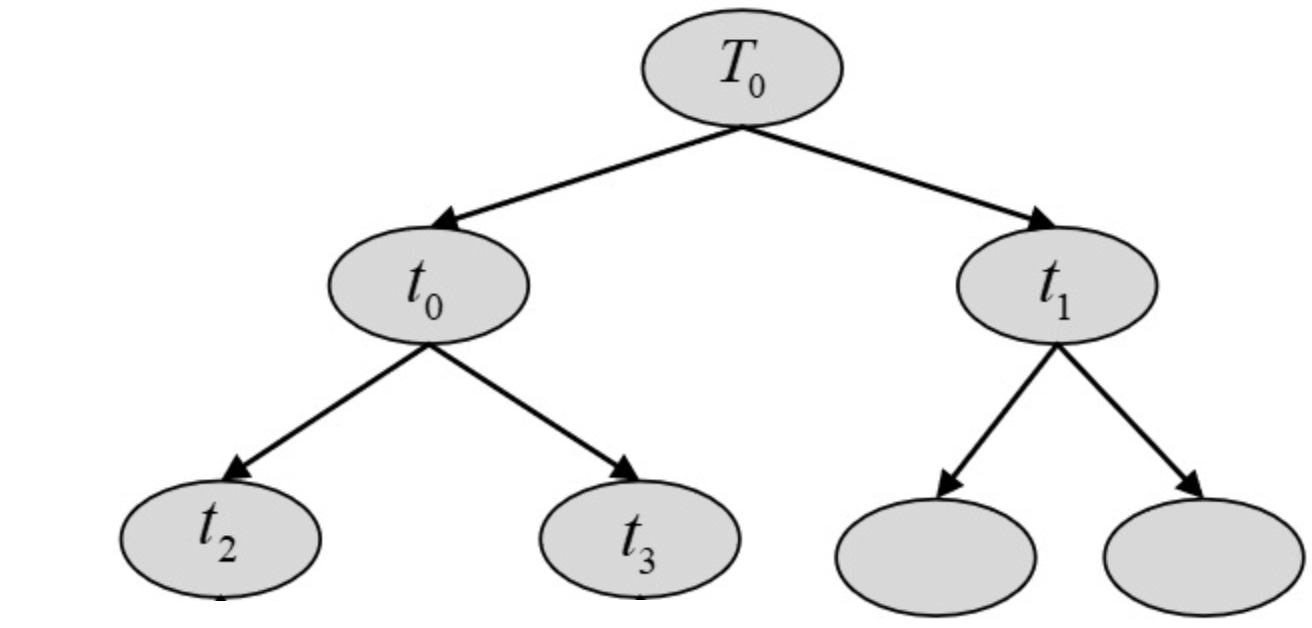

In [2]:
Image(filename=('./cart.png')
      ,width=500)

<!-- <img style="border-radius: 0.3125em;box-shadow: 0 2px 4px 0 rgba(34,36,38,.12),0 2px 10px 0 rgba(34,36,38,.08);width: 500px;" src="./cart.png"> -->

### 迴歸樹
迴歸樹的核心是將特徵空間劃分為許多空間，且每次劃分只劃分兩個分枝（將連續型特徵間斷化），最終使每個空間有著一個固定的輸出值。現在假設$x$,$y$分別為輸入與輸出，給定數據集$D=\{(X_1,y_1),(X_2,y_2),\cdots,(X_N,y_N)\}$，$X_i=(x_{i}^{(1)}, x_{i}^{(2)}, ......, x_{i}^{(k)})^T$來生成迴歸樹，目標為將特徵空間劃分為$M$個空間$(R_1,R_2,\cdots,R_M)$每個$R_m$有個固定的輸出$c_m$，我們可將模型表達為：
$$
f(X)=\sum_{m=1}^{M}c_mI(X\in R_m)
$$
至於輸出值$c_m$要如何估計出來，是需要透過每個空間的平方誤差$\sum_{X_i\in R_m}(y_i-f(X_i))^2$最小來估計，得到$\hat c_m$應為訓練樣本中
被分到$R_m$的那些樣本的樣本平均數，即$\hat c_m=ave(y_i|X_i \in R_m)$。<br>

接著回到一開始，我們要透過怎麼樣的方式來劃分空間呢？，迴歸樹每次都需要以特徵切分的方式，依某特徵$x^{(j)}$的切分點$s^{(j)}$將當前的樣本集切分為兩個區域（二叉樹），得到$R_1(j,s)=(X|x^{(j)}\leq s^{(j)})$與$R_2(j,s)=(X|x^{(j)}> s^{(j)})$兩空間並使得兩個區域的誤差都最小，單次劃分如下式：
$$
\min_{j,s}\left[\min_{c_1}\sum_{X_i \in R_1(j,s)}(y_i-c_1)^2+\min_{c_2}\sum_{X_i \in R_2(j,s)}(y_i-c_2)^2\right]
$$
上式的意思白話的說就是先找出每個特徵最佳的切分點後，在比較哪個用哪個特徵劃分能使當前樣本集的誤差最小。
整個迴歸樹的生成就是不斷的做上面的操作直到滿足停止條件為止，例如：生成前先預設樹的深度。
### 分類樹
分類樹是利用Gini指數來選擇當前樣本最優的特徵來劃分，同時也決定最優的切分點，Gini指數也表示集合的不確定性，指數越大，不確定性越大，所以我們在生成的過成中要選擇Gini指數小的特徵與切分點來作為優先的切分選擇。在分類的問題中，我們假設有$K$個類別，樣本屬於$k$類的機率為$p_k$，則可以將Gini指數定義為：

$$
Gini(p)=\sum_{k=1}^{K}p_k(1-p_k)
$$
在樣本集合$D$空間中，$|C_k|$為$D$空間中屬於$k$類的樣本個數，Gini指數為：

$$
Gini(D)=1-\sum_{k=1}^{K}\left( \frac{|C_k|}{|D|} \right)^2
$$

接著我們在擴展一下在樣本集合$D$空間中透過某個特徵$A=a$劃分成兩個空間，$D_1=\left\{ (X,y)\in D|A=a \right\}$，$D_2=D-D_1$，此時的Gini指數為：

$$
Gini(D,A=a)=\frac{|D_1|}{|D|}Gini(D_1)+\frac{|D_2|}{|D|}Gini(D_2)
$$

生成的過程中就是在每個切分的階段，計算每個特徵以及他們的可能的切分點，找出Gini指數最小的特徵以及切分點當作當前劃分的依據，重複這個這些操作直到滿足停止條件，例如：樣本個數低於某個最低值、Gini指數太小（表示基本上該樣本子集都是同一類了）等等。
### CART剪枝
在生成過程中，我們得到一棵最大的樹$T_0$，而剪枝的過程一樣是透過損失函數的方式來剪枝，損失函數如下：

$$
C_\alpha(T)=C(T)+\alpha|T|
$$

CART剪枝的過程如下：<br>

step1:計算$T_0$當中「每個內部節點$t$」的單點損失函數，計算式如下：

$$
C_\alpha(t)=C(t)+\alpha
$$

step2:計算$T_0$當中「每個內部節點$t$為根節點」的樹$T_t$損失函數，計算式如下：

$$
C_\alpha(T_t)=C(T_t)+\alpha|T_t|
$$

step3:比較step1與step2中每個點$t$的計算結果，若$C_\alpha(t)\leq C_\alpha(T_t)$，代表應該要剪枝，而參數$\alpha$會影響比較結果，一般而言，當$\alpha=0$時，$C_\alpha(t)>C_\alpha(T_t)$，因為沒有考慮複雜度，複雜的模型的損失函數會大於剪枝後的模型；當$\alpha$逐漸增大時，會有一處剛好滿足$C_\alpha(t)=C_\alpha(T_t)$，此時的$\alpha=g(t)=\frac{C(t)-C(T_t)}{|T_t|-1}$，這時候，應該要剪枝，理由為兩者的損失函數相同，何不選擇較簡單的模型即可呢？

step4:由於我們在step3中得到很多點$t$的$C_\alpha(t)$與$C_\alpha(T_t)$計算結果，我們選擇剪去最小$g(t)$的那個$T_t$的葉節點，得到樹$T_1$，並將該$g(t)$記為$\alpha_1$，這樣做的理由是為了保證一次只剪掉一個分枝，讓一個$g(t)$都對只應到一個最佳的樹，如果我們剪去別的葉節點（即剪去$\alpha=g(t)$非最小的$T_t$葉節點），以損失函數極小的條件下，那是不是原本最小$g(t)$的那個$C_t$葉節點也應該要被剪去，總之這麼做是為了使每一個$g(t)$都對只應到一個最佳的樹。

step5:將step4得到的樹繼續重複step1~step4步驟直到$T_0$的根節點。

step6:此時得到了最優子樹序列$\{T_1,T_2,\cdots,T_n\}$每個子樹都對應到了一個$g(t)=\alpha$，即$\{\alpha_1,\alpha_2,\cdots,\alpha_n\}$，將$\{T_0,T_1,T_2,\cdots,T_n\}$進行交叉驗證，選出最優子樹序列中的最優子樹$T_\alpha$當作模型。

# python sklearn實現決策樹模型
本節中將透過kaggle上很知名的Titanic數據集來實現決策樹算法，透過模型的建立決策樹來預測船上乘客的存活率。

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [4]:
data = pd.read_csv("./data.csv",index_col = 0)


# 觀察前10筆數據
data.head(10) 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## 數據預處理
在預處理的過程中，建議每一步都重新透過data.info()的方式來看看當前數據的狀況再接著做後續處理

In [6]:
# 刪除缺失值過多的col 以及 對於預測沒有幫助的col 
# inplace=True 表示drop後的結果直接覆蓋原來的dataframe
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)

# 對缺失值較多的col（年齡）進行填補，以平均數的方式填補
data["Age"] = data["Age"].fillna(data["Age"].mean())

# Embarked只有2個na，可以直接刪除那兩筆樣本
data = data.dropna()


# 把Sex轉為數值
data["Sex"] = (data["Sex"]== "male").astype("int")

# 把Embarked轉為數值
labels = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


In [7]:
X = data.iloc[:,data.columns != "Survived"]
y = data.iloc[:,data.columns == "Survived"]

In [8]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)

# 讓Xtrain, Xtest, Ytrain, Ytest的index由0開始
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

    
Xtrain.head()
type(Ytrain)

pandas.core.frame.DataFrame

## 建立模型與模型評估

這邊單純的不考慮剪枝，直接將樹完整的生成

In [9]:
# 用上面的Xtrain, Xtest, Ytrain, Ytest單純建模一次看看
clf = DecisionTreeClassifier(random_state=87)
clf = clf.fit(Xtrain, Ytrain)
score_ = clf.score(Xtest, Ytest)
score_


# score輸出為accuracy

0.8127340823970037

In [10]:
[*zip(Xtrain.columns,clf.feature_importances_)]

[('Pclass', 0.12492877266734374),
 ('Sex', 0.27353137515609144),
 ('Age', 0.2264972642434496),
 ('SibSp', 0.052120503076613145),
 ('Parch', 0.022857683452109787),
 ('Fare', 0.2710245288393251),
 ('Embarked', 0.02903987256506725)]

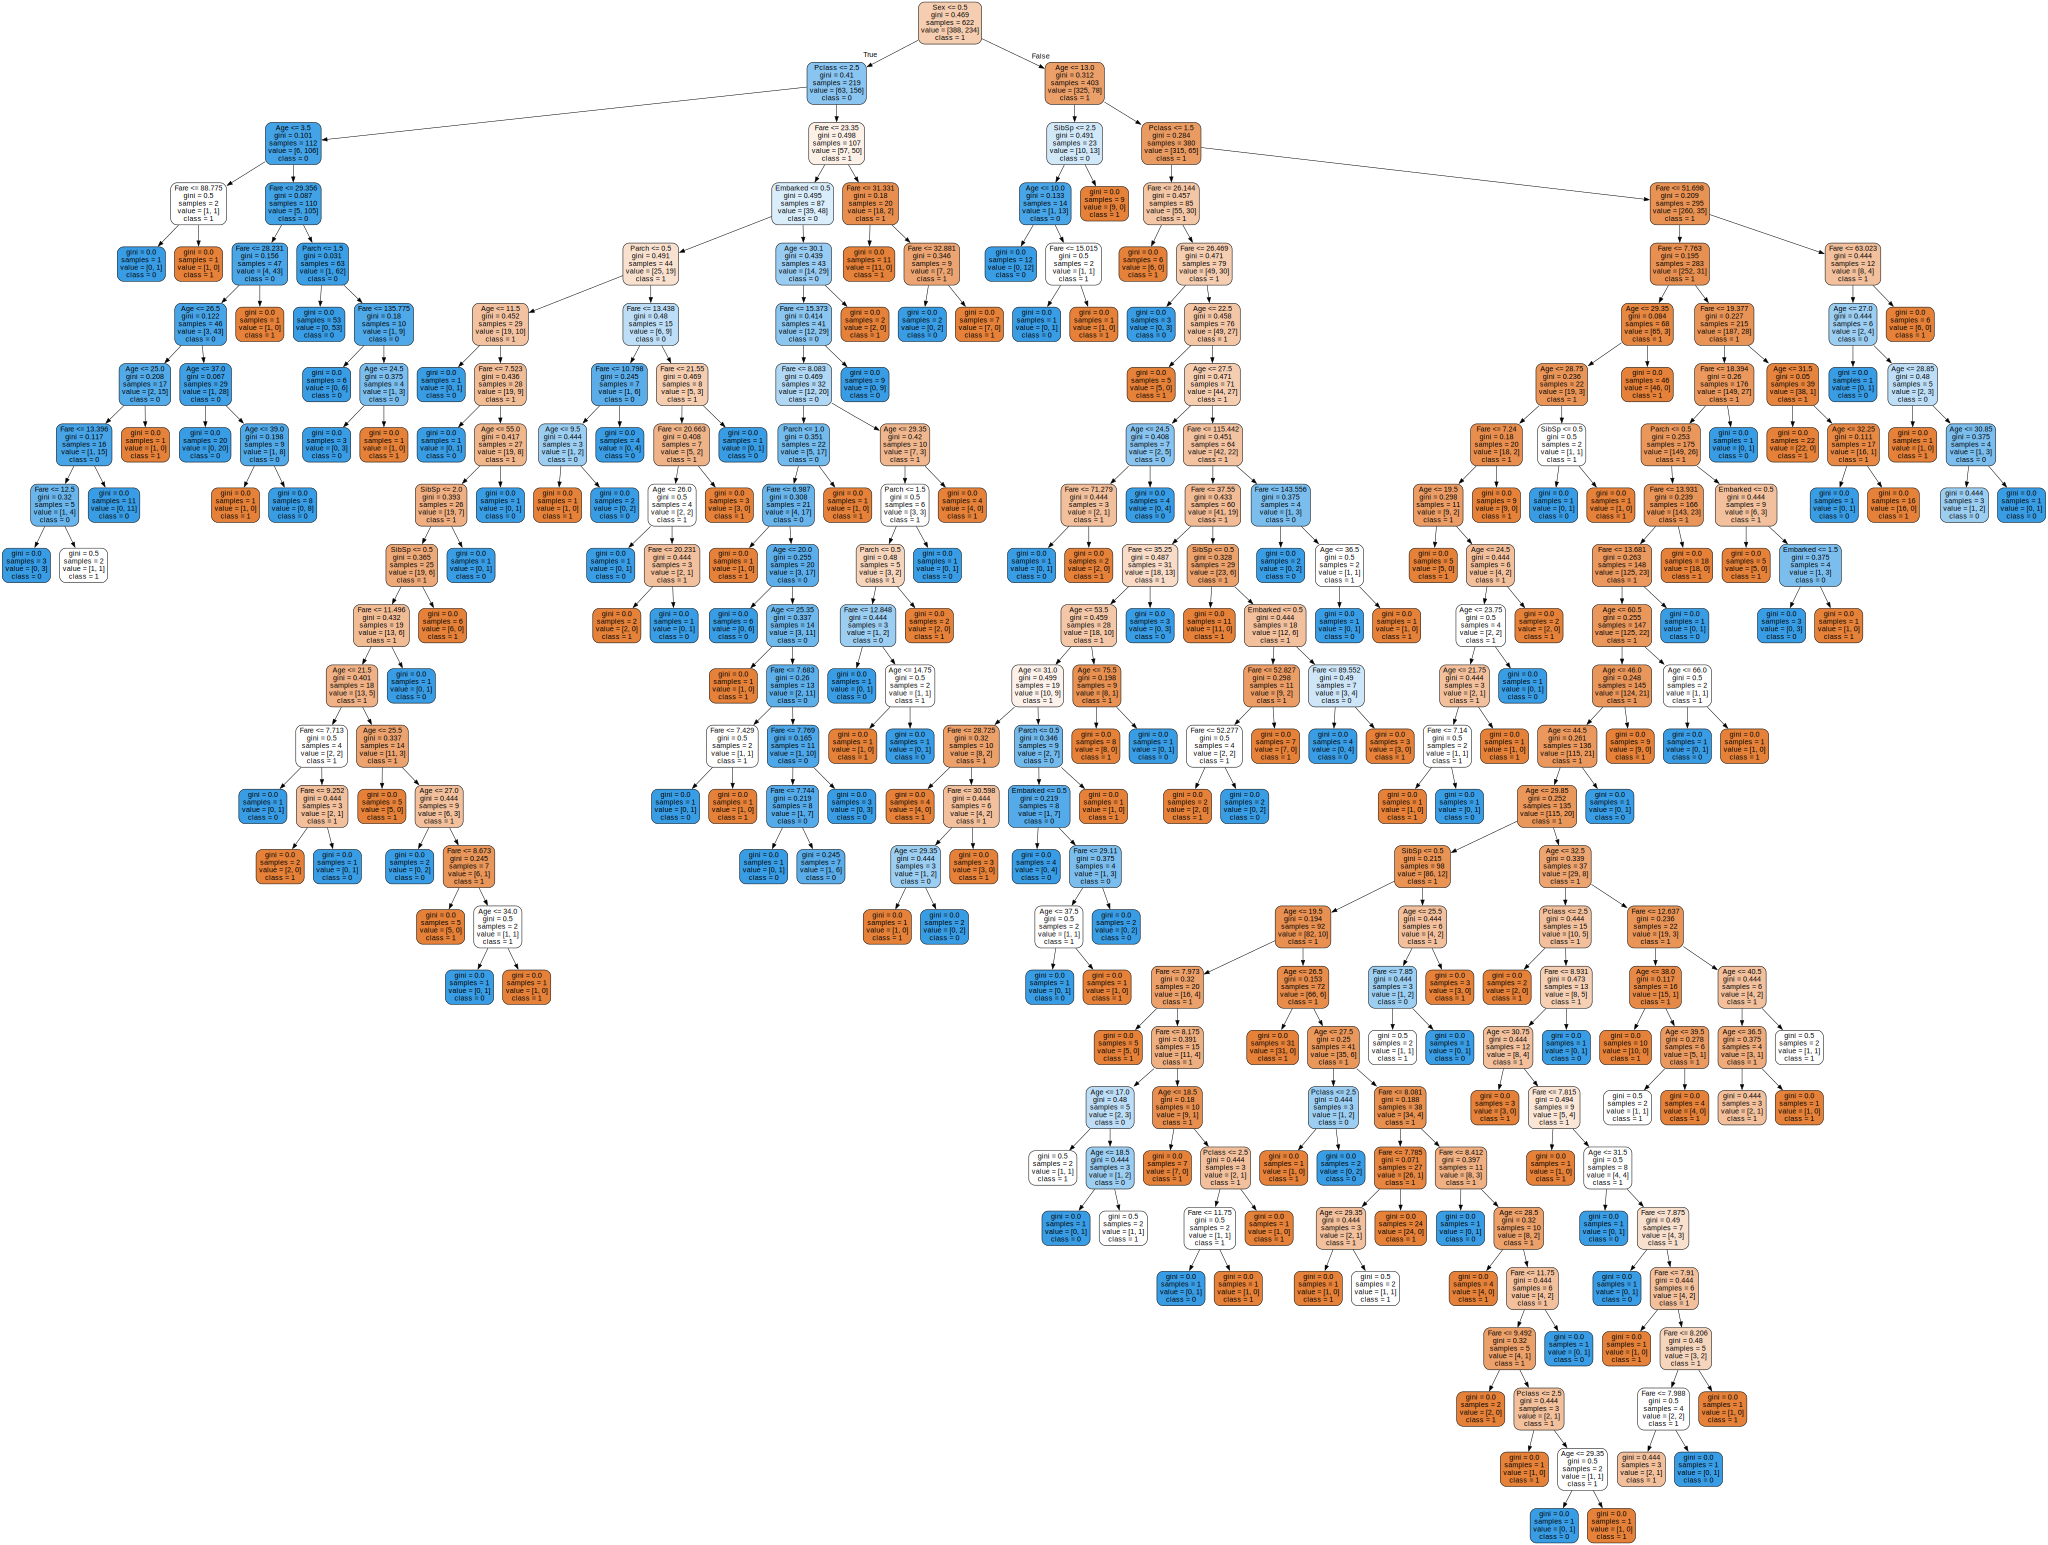

In [11]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(clf
                                ,feature_names= Xtrain.columns
                                ,class_names=["1","0"]
                                ,filled=True
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

In [12]:
# 以10折交叉驗證的方式看看平均accuracy
clf = DecisionTreeClassifier(random_state=87)
score = cross_val_score(clf,X,y,cv=10).mean()
score

0.7773237997957099

根據上圖的模型與在交叉驗證上的表現，可得知在未剪枝的情況下表現並沒有特別的好，因為樹的深度太深了，除此之外樹很深的狀況下對於模型的解讀十分不容易，因此接下來考慮從設置樹的深度來剪枝。

0.8177860061287026


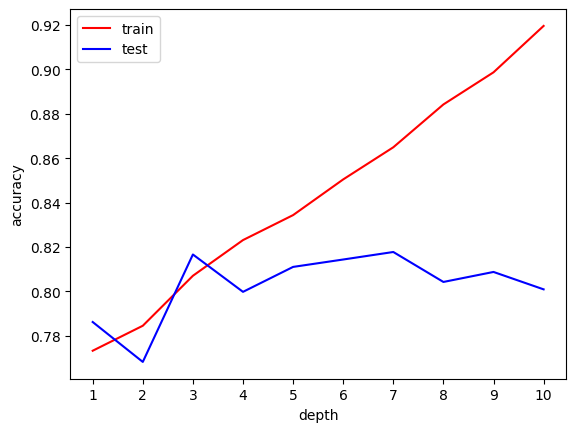

In [13]:
# 可視化 樹的深度與accuracy間的關係

train = []
test = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                 ,max_depth=i+1
                                 ,criterion="entropy"
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score_train = clf.score(Xtrain,Ytrain)
    score_test = cross_val_score(clf,X,y,cv=10).mean()
    train.append(score_train)
    test.append(score_test)
print(max(test))
plt.plot(range(1,11),train,color="red",label="train")
plt.plot(range(1,11),test,color="blue",label="test")
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.xticks(range(1,11))
plt.legend()
plt.show()

除了設置樹的深度外，也可以用網格搜索的方式設置其他參數。

In [14]:
# 網格搜索建模參數
import numpy as np
gini_thresholds = np.linspace(0,0.5,20)

para = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
              ,"max_depth":[*range(1,10)]
              ,'min_samples_leaf':[*range(1,50,5)]
             }

clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, para, cv=10)
GS.fit(Xtrain,Ytrain)

GS.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'splitter': 'random'}

In [16]:
GS.best_score_

0.818279569892473

使用網格搜索的方式運行時間需要一陣子，透過.best_params_屬性找到的最佳參數，.best_score_屬性展示出在最佳參數的設置下的交叉驗證平均預測表現，在這個例子中，預測表現並沒有顯著的提升。